In [3]:
# Load libraries
import pysd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd
from SALib.sample.morris import sample as morris_sample
from SALib.analyze.morris import analyze as morris_analyze


# Load Vensim model
model = pysd.read_vensim('SFD Model_10.20.2025_unconstrained.mdl')

results = model.run(params={'initial_time': 0, 'final_time': 60, 'time_step': 1})

model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Absence of Role Model Mentor,absence_of_role_model_mentor,None,1/Month,"(nan, nan)",Constant,Normal,None
1,Access to Social Resources,access_to_social_resources,None,1/Month,"(nan, nan)",Constant,Normal,None
2,Active Surveillance,active_surveillance,None,1/Month,"(nan, nan)",Constant,Normal,None
3,Adversarial Environment,adversarial_environment,None,1/Month,"(nan, nan)",Constant,Normal,None
4,Controlled Isolation,controlled_isolation,None,1/Month,"(nan, nan)",Auxiliary,Normal,None
5,Controlled Narrative,controlled_narrative,None,1/Month,"(nan, nan)",Constant,Normal,None
6,DeEscalation Efforts,deescalation_efforts,None,1/Month,"(nan, nan)",Auxiliary,Normal,None
7,Death and Incarceration,death_and_incarceration,None,Persons/Month,"(nan, nan)",Auxiliary,Normal,None
8,Death and Incarceration Rate,death_and_incarceration_rate,None,1/Month,"(nan, nan)",Constant,Normal,None
9,Demobilization,demobilization,None,Persons/Month,"(nan, nan)",Auxiliary,Normal,None


C:\Users\octav\.conda\envs\BaselinWorkspace\lib\site-packages\pysd\py_backend\model.py:1141: UserWarning: Replacing a variable by a constant value.
  warnings.warn("Replacing a variable by a constant value.")


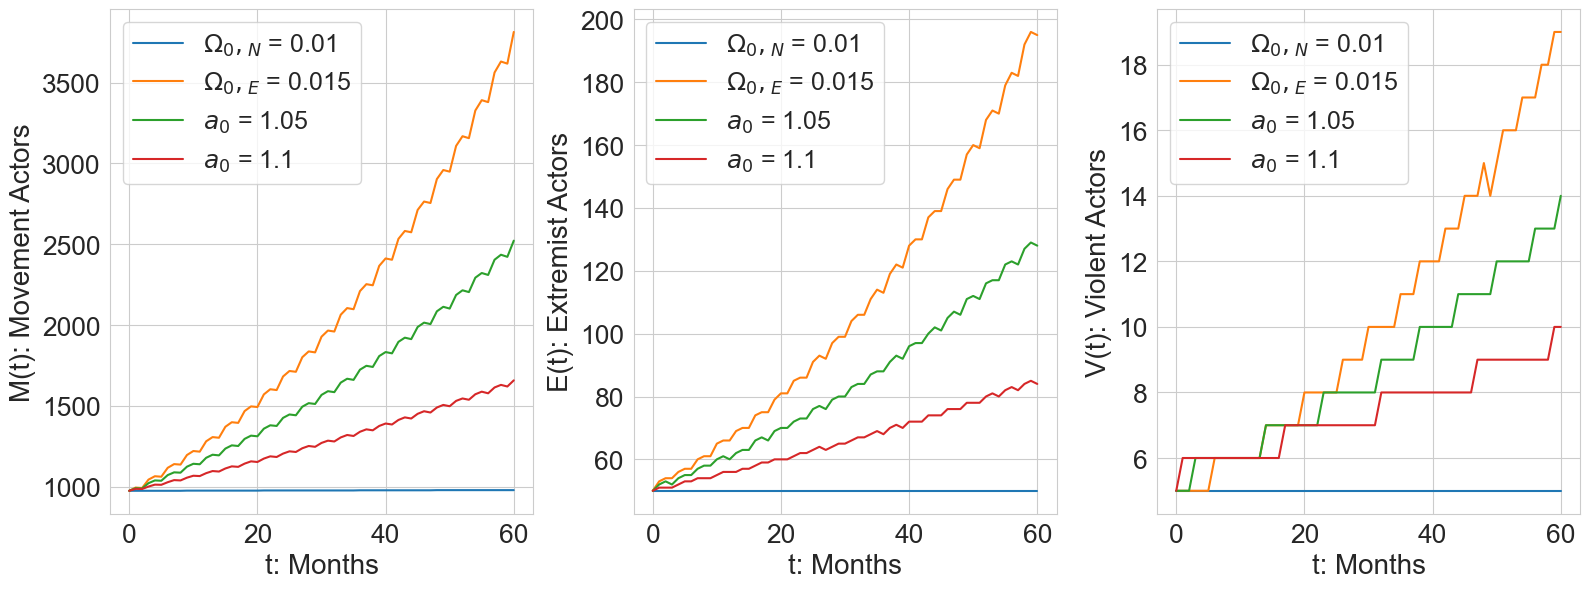

In [4]:
# Run Simulation #1 with a focus on Perception of Crisis
crisis1 = model.run(params={'perception of crisis': 0.01}, return_columns=['Movement Actors', 'Extremist Actors', 'Violent Actors'])
crisis2 = model.run(params={'perception of crisis': 0.0125}, return_columns=['Movement Actors', 'Extremist Actors', 'Violent Actors'])
crisis3 = model.run(params={'perception of crisis': 0.0125, 'active surveillance': 1.05}, return_columns=['Movement Actors', 'Extremist Actors', 'Violent Actors'])
crisis4 = model.run(params={'perception of crisis': 0.0125, 'active surveillance': 1.1}, return_columns=['Movement Actors', 'Extremist Actors', 'Violent Actors'])

# Round the values
crisis1 = crisis1.round()
crisis2 = crisis2.round()
crisis3 = crisis3.round()
crisis4 = crisis4.round()

# Plot Simulation
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

columns = ['Movement Actors', 'Extremist Actors', 'Violent Actors']
labels = ['M(t): Movement Actors', 'E(t): Extremist Actors', 'V(t): Violent Actors']
for ax, column, label in zip(axs, columns, labels):
    ax.plot(crisis1.index, crisis1[column], label='$Ω_0,_N$ = 0.01')
    ax.plot(crisis2.index, crisis2[column], label='$Ω_0,_E$ = 0.015')
    ax.plot(crisis3.index, crisis3[column], label='$a_0$ = 1.05')
    ax.plot(crisis4.index, crisis4[column], label='$a_0$ = 1.1')
    ax.set_ylabel(label, fontsize=20)
    ax.set_xlabel('t: Months', fontsize=20)
    ax.tick_params(axis='y', labelsize=19)
    ax.tick_params(axis='x', labelsize=19)
    ax.grid(True)
    ax.legend(fontsize=18)

plt.tight_layout()
plt.show()

C:\Users\octav\.conda\envs\BaselinWorkspace\lib\site-packages\pysd\py_backend\model.py:1129: UserWarning: Replacing a constant value with a callable. The value may not be constant anymore.
  warnings.warn(


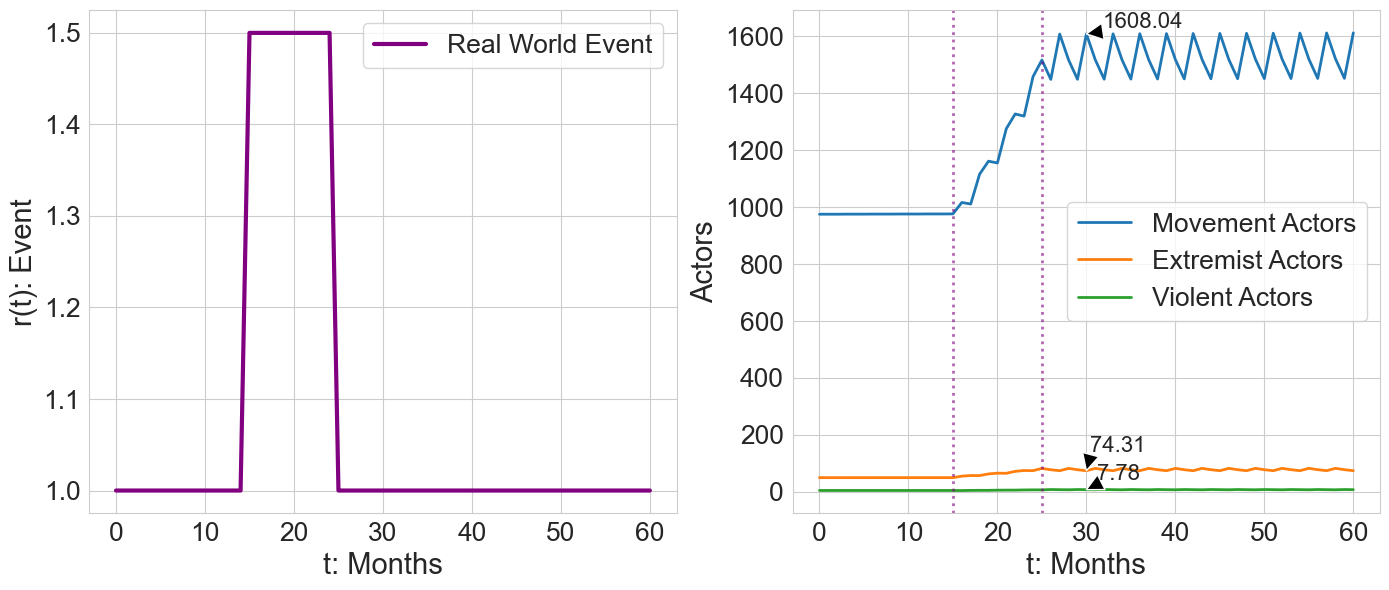

In [5]:
# Run Simulation #2 with a focus on a spiked Media Event (Jan 6th)
# Reload Vensim model (fresh run)
model = pysd.read_vensim('SFD Model_10.20.2025_unconstrained.mdl')

# Create STEP function similar to VENSIM
def step(time):
    if time >= 25:
        return 1.0
    elif time >= 15:
        return 1.5
    else:
        return 1.0

model.set_components({'Real World Event': lambda: step(model.components.time())})

# Run the model
results = model.run(params={'initial_time': 0, 'final_time': 60, 'time_step': 1}, return_columns=['Real World Event'])
values = model.run(return_columns=['Movement Actors', 'Extremist Actors', 'Violent Actors'])

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(results.index, results['Real World Event'], label='Real World Event', color='purple', linewidth=3)
axs[0].set_ylabel('r(t): Event', fontsize=21)
axs[0].set_xlabel('t: Months', fontsize=21)
axs[0].grid(True)
axs[0].legend(fontsize=19)
axs[0].tick_params(axis='y', labelsize=19, which='major', length=3, width=5)
axs[0].tick_params(axis='x', labelsize=19, which='major', length=3, width=5)

values.plot(ax=axs[1], linewidth=2)
axs[1].set_ylabel('Actors', fontsize=21)
axs[1].set_xlabel('t: Months', fontsize=21)
axs[1].grid(True)
axs[1].legend(fontsize=19)
axs[1].tick_params(axis='y', labelsize=19, which='major', length=3, width=5)
axs[1].tick_params(axis='x', labelsize=19, which='major', length=3, width=5)

axs[1].axvline(x=15, color='purple', linestyle=':', linewidth=2, alpha=0.6)
axs[1].axvline(x=25, color='purple', linestyle=':', linewidth=2, alpha=0.6)

month_30 = 30
texts = []
for column in values.columns:
    value_at_30 = values.loc[month_30, column]
    text = axs[1].annotate(f'{value_at_30:.2f}', xy=(month_30, value_at_30), xytext=(month_30, value_at_30 + 20), fontsize=16,
                           arrowprops=dict(facecolor='black', shrink=5))
    texts.append(text)

adjust_text(texts)

plt.tight_layout()
plt.show()

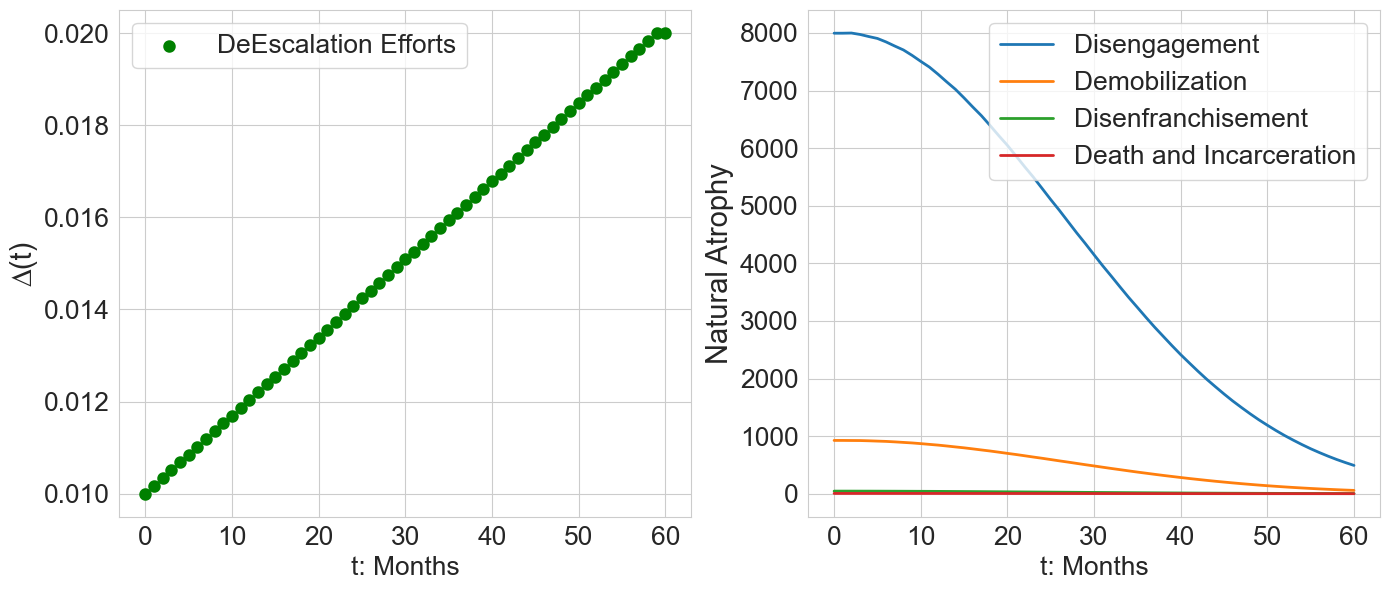

In [6]:
# Run Simulation #3 with a focus on De-Escalation Efforts
# Reload Vensim model (fresh run)
model = pysd.read_vensim('SFD Model_10.20.2025_unconstrained.mdl')

# Create Pulse function similar to VENSIM,
pulsing = pd.Series(np.linspace(0.01, 0.02, 60), index=range(60))
pulse = model.run(params={'initial_time': 0, 'final_time': 60, 'time_step': 1, 'DeEscalation Efforts': pulsing}, return_columns=['DeEscalation Efforts'])
atrophy = model.run(return_columns=['Disengagement', 'Demobilization', 'Disenfranchisement', 'Death and Incarceration'])

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(pulse.index, pulse['DeEscalation Efforts'], label='DeEscalation Efforts', color='green', linewidth=3)
axs[0].set_ylabel('∆(t)', fontsize=21)
axs[0].set_xlabel('t: Months', fontsize=19)
axs[0].grid(True)
axs[0].legend(fontsize=19)
axs[0].tick_params(axis='y', labelsize=19)
axs[0].tick_params(axis='x', labelsize=19)

atrophy.plot(ax=axs[1], linewidth=2)
axs[1].set_ylabel('Natural Atrophy', fontsize=21)
axs[1].set_xlabel('t: Months', fontsize=19)
axs[1].grid(True)
axs[1].legend(fontsize=19)
axs[1].tick_params(axis='y', labelsize=19)
axs[1].tick_params(axis='x', labelsize=19)

plt.tight_layout()
plt.show()